In [1]:
from pathlib import Path

# Get the current working directory as a Path object
current_path = Path.cwd()
home_folder = 'evan_home'

# Traverse up the directory tree until you find the target folder
for parent in [current_path] + list(current_path.parents):
    if parent.name == home_folder:
        home_path = parent
        break
else:
    raise ValueError(f"Folder '{home_folder}' not found in the current working directory.")

print("Home Path:", home_path)
source_code_dir = home_path / 'Source_code'
dataset_dir = home_path / 'Dataset'


Home Path: c:\Users\evanlee\Documents\Bmi_NAS_evan\evan_home


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

## Read PreLect features

In [3]:
types = ['ASDC', 'B_intermediate', 'B_memory', 'B_naive', 'CD14_Mono', 'CD16_Mono', 'CD4_CTL', 'CD4_Naive', 'CD4_Proliferating', 'CD4_TCM', 'CD4_TEM', 'CD8_Naive', 'CD8_Proliferating', 'CD8_TCM', 'CD8_TEM', 'Doublet', 'Eryth', 'HSPC', 'ILC', 'MAIT', 'NK', 'NK_CD56bright', 'NK_Proliferating', 'Plasmablast', 'Platelet', 'Treg', 'cDC1', 'cDC2', 'dnT', 'gdT', 'pDC']

In [4]:
# os.chdir(r'C:\Users\evanlee\Documents\GitHub\EvanPys\Progress\PBMC_Hao_batch_noZ\Level2\feature_selection_k3')
os.chdir(source_code_dir / 'PBMC_Hao_batch_noZ/Level2/feature_selection_k3')

features_dict = {}
# Read features for each celltype
for celltype in types:
    try:
        feature_df_k3 = pd.read_csv(f'{celltype}_features.txt', names=['Gene', 'Weight', 'Tendency'], sep='\t')
        features_dict[celltype] = feature_df_k3
    except:
        print('skipping:', celltype)
        continue

count_df_k3 = pd.DataFrame(columns=['Feature_count', 'Positive_feature_count'])
for celltype in features_dict.keys():
    feature_df_k3 = features_dict[celltype]
    feature_count = feature_df_k3.shape[0]
    positive_count = feature_df_k3[feature_df_k3['Tendency'] == 1].shape[0]
    count_df_k3.loc[celltype] = [feature_count, positive_count]
count_df_k3

,Feature_count,Positive_feature_count
ASDC,47,25
B_intermediate,96,49
B_memory,170,90
B_naive,9,6
CD14_Mono,29,16
CD16_Mono,37,17
CD4_CTL,122,45
CD4_Naive,730,393
CD4_Proliferating,70,35
CD4_TCM,247,133


## Read overlapped markers with ACT

In [5]:
# with open(r"C:\Users\evanlee\Documents\GitHub\EvanPys\Progress\PBMC_Hao_batch_noZ\Level2\ACT_annotation\L2_PreLect_ACT_overlap.json", 'r') as f:
#     overlapped_dict = json.load(f)
with open(source_code_dir / 'PBMC_Hao_batch_noZ/Level2/ACT_annotation/L2_PreLect_ACT_overlap.json', 'r') as f:
    overlapped_dict = json.load(f)
overlapped_dict

{'B_memory': ['IGHG1', 'IGHG3', 'IGHM', 'AIM2', 'MS4A1'],
 'B_naive': ['IGHM', 'IGHD', 'MS4A1', 'TCL1A'],
 'CD14_Mono': ['LYZ',
  'NEAT1',
  'VCAN',
  'S100A8',
  'MS4A6A',
  'CD14',
  'S100A9',
  'CEBPD',
  'FCN1'],
 'CD16_Mono': ['CST3', 'AIF1', 'LST1', 'CDKN1C', 'FCER1G', 'TCF7L2', 'FCGR3A'],
 'CD4_Proliferating': ['MKI67', 'STMN1', 'TUBA1B'],
 'CD4_TCM': ['MAL',
  'CD69',
  'TRAC',
  'IL32',
  'TMSB10',
  'AQP3',
  'SELL',
  'CD3D',
  'LDHB',
  'LTB',
  'CD3G',
  'ITGB1',
  'ZFP36L2',
  'CD4',
  'KLF2',
  'CD3E',
  'ANXA1',
  'IL7R'],
 'CD4_TEM': ['GZMA',
  'KLRB1',
  'GNLY',
  'CD3G',
  'ITGB1',
  'CD4',
  'PTPRC',
  'GZMK',
  'IL7R',
  'CCL5'],
 'CD8_Naive': ['CD8A',
  'CCR7',
  'SELL',
  'CD8B',
  'CD27',
  'CD3E',
  'CD3D',
  'IL7R',
  'LEF1'],
 'CD8_TEM': ['NKG7',
  'TRAC',
  'TRGC2',
  'CD8A',
  'GZMA',
  'KLRD1',
  'GNLY',
  'CST7',
  'CD8B',
  'CD3G',
  'GZMH',
  'CD3D',
  'PRF1',
  'GZMK',
  'CCL5'],
 'cDC1': ['BATF3', 'HLA-DPA1', 'CLEC9A'],
 'cDC2': ['CLEC10A', 'FCER1A'],

In [5]:
features_dict.keys()

dict_keys(['ASDC', 'B_intermediate', 'B_memory', 'B_naive', 'CD14_Mono', 'CD16_Mono', 'CD4_CTL', 'CD4_Naive', 'CD4_Proliferating', 'CD4_TCM', 'CD4_TEM', 'CD8_Naive', 'CD8_Proliferating', 'CD8_TCM', 'CD8_TEM', 'Doublet', 'Eryth', 'HSPC', 'ILC', 'MAIT', 'NK', 'NK_CD56bright', 'NK_Proliferating', 'Plasmablast', 'Platelet', 'Treg', 'cDC1', 'cDC2', 'dnT', 'gdT', 'pDC'])

In [6]:
overlapped_dict.keys()

dict_keys(['B_memory', 'B_naive', 'CD14_Mono', 'CD16_Mono', 'CD4_Proliferating', 'CD4_TCM', 'CD4_TEM', 'CD8_Naive', 'CD8_TEM', 'cDC1', 'cDC2', 'gdT', 'HSPC', 'MAIT', 'pDC', 'Treg', 'CD4_CTL', 'CD4_Naive', 'CD8_TCM', 'Plasmablast', 'NK', 'NK_CD56bright'])

In [7]:
# add a new column "in_ACT" to indicate whether the PreLect feature is overlapped with ACT
for k, df in features_dict.items():
    print(k)
    if k not in overlapped_dict.keys():
        continue
    overlap = overlapped_dict[k]
    df['in_ACT'] = ['ACT' if gene in overlap else 'not_ACT' for gene in df['Gene']]

ASDC
B_intermediate
B_memory
B_naive
CD14_Mono
CD16_Mono
CD4_CTL
CD4_Naive
CD4_Proliferating
CD4_TCM
CD4_TEM
CD8_Naive
CD8_Proliferating
CD8_TCM
CD8_TEM
Doublet
Eryth
HSPC
ILC
MAIT
NK
NK_CD56bright
NK_Proliferating
Plasmablast
Platelet
Treg
cDC1
cDC2
dnT
gdT
pDC


In [9]:
features_dict['B_memory']['in_ACT'].value_counts()

in_ACT
not_ACT    165
ACT          5
Name: count, dtype: int64

## Plot PreLect weight boxplot

In [11]:
data_is_ACT = dict()
data_not_ACT = dict()
for k, df in features_dict.items():
    # print(k)
    if k not in overlapped_dict.keys():
        continue
    weight_is_ACT = df[df['in_ACT'] == 'ACT']['Weight'].to_numpy()
    weight_not_ACT = df[df['in_ACT'] == 'not_ACT']['Weight'].to_numpy()
    data_is_ACT[k] = weight_is_ACT
    data_not_ACT[k] = weight_not_ACT

    # # Creating boxplots for 'Weight'
    # plt.figure(figsize=(2, 4))
    # plt.boxplot(
    #     [weight_is_ACT, weight_not_ACT],
    #     labels=['ACT', 'not_ACT'],
    #     patch_artist=True
    # )
    # plt.title(f'Weight Distribution for {k}')
    # plt.ylabel('Weight')
    # plt.xlabel('Group')
    # plt.show()

In [12]:
data_is_ACT

{'B_memory': array([ 0.7069023 ,  0.24476634,  0.15972236,  0.09891031, -1.2852663 ]),
 'B_naive': array([0.01900108, 0.90641415, 0.8438536 , 0.9344064 ]),
 'CD14_Mono': array([0.19319305, 0.35626823, 0.2905162 , 0.7201669 , 0.00697333,
        0.35308737, 0.18166958, 0.43792617, 0.5601206 ]),
 'CD16_Mono': array([0.03865838, 1.2931192 , 0.82205397, 0.5153774 , 0.01431204,
        0.2009586 , 0.04864882]),
 'CD4_CTL': array([0.25008136, 0.8242561 , 0.7221929 ]),
 'CD4_Naive': array([ 6.2820370e-02,  3.7397057e-02,  1.4068356e-01,  1.8644806e-02,
         1.8136756e-01,  6.3069656e-08,  2.8705470e-02,  2.1169247e-02,
        -5.9787475e-02,  4.6367502e-01,  2.1524082e-01,  1.7036666e-06]),
 'CD4_Proliferating': array([0.6224367 , 0.14877777, 0.1013218 ]),
 'CD4_TCM': array([-0.09918035,  0.00790852,  0.03442615,  0.12925047,  0.39735687,
         0.50085545,  0.28017637,  0.2541744 ,  0.01832978,  0.0934495 ,
         0.01157912,  0.7864798 ,  0.23408678,  0.19707601,  0.04451449,
     

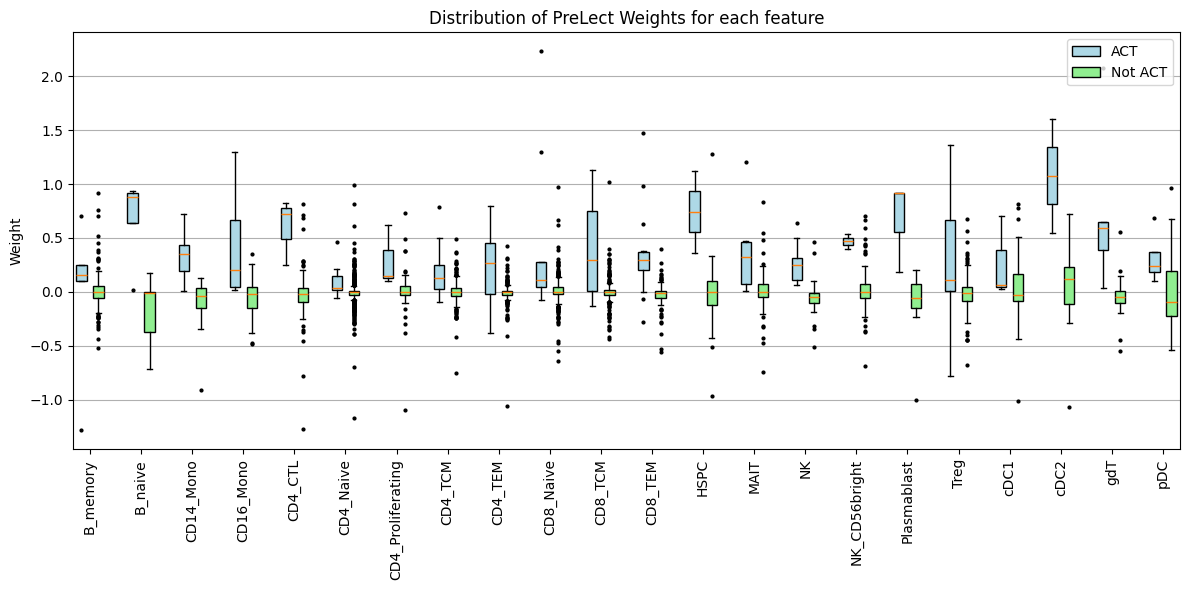

In [23]:
# Prepare data for plotting
keys = list(data_is_ACT.keys())
data_to_plot = []

for key in keys:
    # Collect data for both groups
    is_ACT_data = data_is_ACT[key]
    not_ACT_data = data_not_ACT[key]
    data_to_plot.append([is_ACT_data, not_ACT_data])

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Positions for the boxplots
positions = []
labels = []
for i, key in enumerate(keys):
    positions.extend([i * 3 + 1, i * 3 + 2])
    labels.extend([f"{key}\nACT", f"{key}\nNot ACT"])

# Flatten the data list
flat_data = [item for sublist in data_to_plot for item in sublist]

# Create boxplots
bp = ax.boxplot(flat_data, positions=positions, widths=0.6, patch_artist=True, 
                flierprops={'marker': 'o', 'markersize': 2, 'markerfacecolor': 'black'})

# Customize colors
colors = ['lightblue', 'lightgreen'] * len(keys)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Set x-ticks and labels
ax.set_xticks([i * 3 + 1.5 for i in range(len(keys))])
ax.set_xticklabels(keys)
plt.xticks(rotation=90)

# Add a grid
ax.yaxis.grid(True)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='lightblue', edgecolor='black', label='ACT'),
                   Patch(facecolor='lightgreen', edgecolor='black', label='Not ACT')]
ax.legend(handles=legend_elements, loc='upper right')

# Set labels and title
ax.set_ylabel('Weight')
ax.set_title('Distribution of PreLect Weights for each feature')

# Show plot
plt.tight_layout()
plt.show()

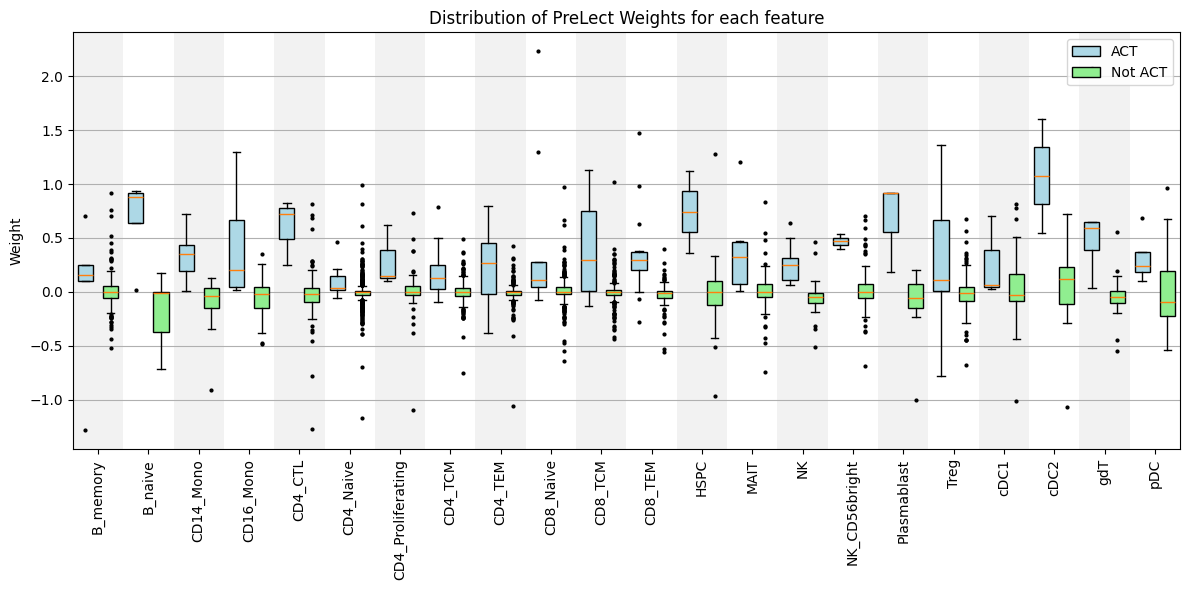

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Data Preparation
keys = list(data_is_ACT.keys())
data_to_plot = []

for key in keys:
    is_ACT_data = data_is_ACT[key]
    not_ACT_data = data_not_ACT[key]
    data_to_plot.append([is_ACT_data, not_ACT_data])

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Positions for the boxplots
positions = []
labels = []
for i, key in enumerate(keys):
    positions.extend([i * 2 + 1, i * 2 + 2])  # Adjust positions to match two columns per key
    labels.extend([f"{key}\nACT", f"{key}\nNot ACT"])

# Flatten the data list
flat_data = [item for sublist in data_to_plot for item in sublist]

# Add alternating gray backgrounds
for i in range(len(keys)):
    if i % 2 == 0:  # Add gray background for even-indexed keys
        start = i * 2 + 0.5  # Start slightly before the first boxplot
        end = (i + 1) * 2 + 0.5  # End slightly after the second boxplot
        ax.axvspan(start, end, facecolor='gray', alpha=0.1)

# Create boxplots
bp = ax.boxplot(flat_data, positions=positions, widths=0.6, patch_artist=True, 
                flierprops={'marker': 'o', 'markersize': 2, 'markerfacecolor': 'black'})

# Customize colors
colors = ['lightblue', 'lightgreen'] * len(keys)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Set x-ticks and labels with 90-degree rotation
ax.set_xticks([i * 2 + 1.5 for i in range(len(keys))])
ax.set_xticklabels(keys, rotation=90)  # Rotate x-tick labels by 90 degrees

# Add a grid
ax.yaxis.grid(True)

# Add legend
legend_elements = [
    Patch(facecolor='lightblue', edgecolor='black', label='ACT'),
    Patch(facecolor='lightgreen', edgecolor='black', label='Not ACT')
]
ax.legend(handles=legend_elements, loc='upper right')

# Set labels and title
ax.set_ylabel('Weight')
ax.set_title('Distribution of PreLect Weights for each feature')

# Show plot
plt.tight_layout()
plt.show()
